# PCA를 이용해서 diabates 적용

### PCA(Principal Component Analysis)는 고차원 데이터의 차원을 축소하는 기법입니다. 데이터의 중요한 특성을 유지하면서 불필요한 정보를 줄이기 위해 사용

1. 데이터 정규화 : PCA를 적용하기 전에 각 특성의 평균을 0으로, 분산을 1로 맞추기 위해 데이터를 정규화합니다.

2. 공분산 행렬 계산 : 정규화된 데이터에서 각 특성 간의 공분산을 계산하여 공분산 행렬을 만듭니다. 이 행렬은 특성 간의 관계를 보여줍니다.

3. 고유값 및 고유벡터 계산 : 공분산 행렬의 고유값과 고유벡터를 계산합니다. 고유벡터는 데이터의 주성분을 나타내며, 고유값은 해당 주성분이 데이터의 분산을 얼마나 설명하는지를 나타냅니다.

4. 주성분 선택 : 가장 큰 고유값을 가진 고유벡터를 선택하여 주성분을 결정합니다. 보통 첫 번째 몇 개의 주성분만 선택하여 차원을 축소합니다.

5. 데이터 변환 : 선택된 주성분을 사용하여 원본 데이터를 변환합니다. 이렇게 하면 데이터가 더 낮은 차원으로 축소되지만, 가능한 한 많은 정보가 유지됩니다.

PCA는 데이터 시각화, 노이즈 제거, 그리고 머신러닝 모델의 성능 향상에 유용하게 사용됨

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/Administrator/dataset/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [4]:
df.shape

(768, 8)

In [5]:
# 결측치 확인
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18740\1589747868.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


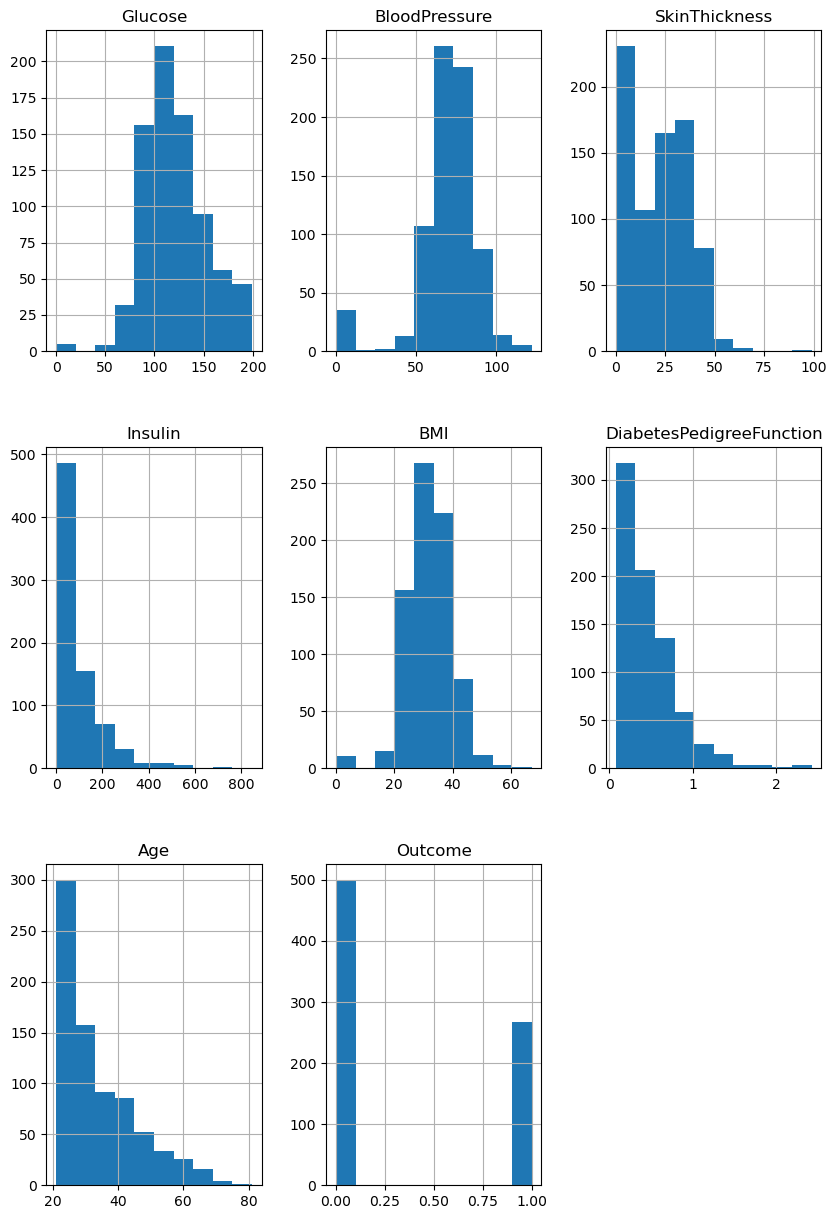

In [7]:
# 시각화
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [9]:
#outcome만 제거하고 x를 만든다
X=df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [10]:
#레이블만 남겨둔다.
y=df['Outcome']
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
# one-hot encode label
y = pd.get_dummies(y).values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size = 0.25, stratify=y, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

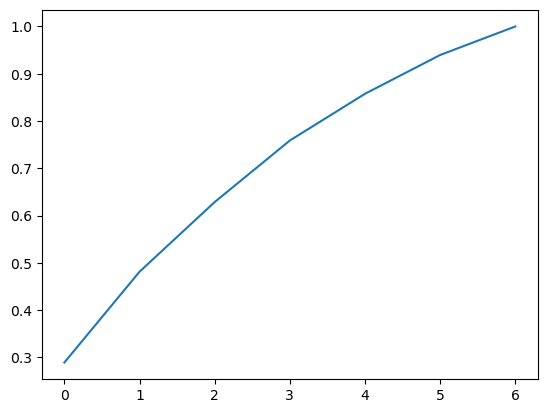

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [15]:
# 80% 분산 보존하는 차원 수 선택 
d = np.argmax(cumsum >= 0.8) + 1 
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [16]:
X_train.shape, X_reduced.shape

((576, 7), (576, 5))

In [28]:
# TensorFlow Keras 모듈을 불러옵니다.
from tensorflow import keras

# 모델 구성
model = keras.Sequential()
input_size = X_reduced.shape[1]  # 축소된 입력 크기
model.add(keras.layers.Input(shape=(input_size,)))  # input_size를 X_reduced의 차원으로 설정
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,154 (35.76 KB)

 Trainable params: 9,154 (35.76 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# 모델 훈련
history = model.fit(X_reduced, y_train, validation_split=0.2, verbose=0, epochs=20, batch_size=32)

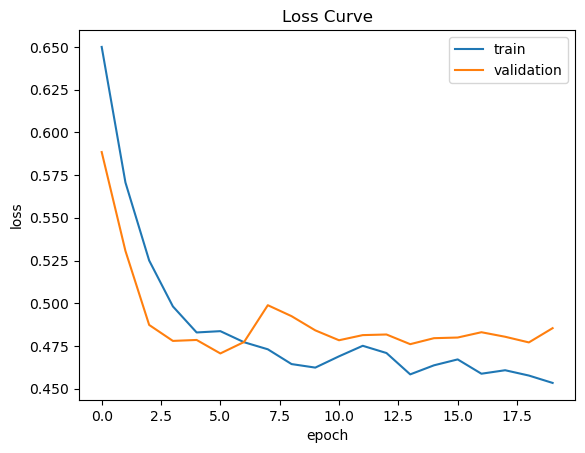

In [31]:
# 손실 곡선 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss Curve')
plt.show()

In [32]:
# 예측
y_pred = model.predict(X_test_reduced)

# 테스트 클래스 예측
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 정확도 및 분류 보고서 출력
print(accuracy_score(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.7552083333333334
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       125
           1       0.68      0.57      0.62        67

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192

